### **Graph Mining (DS 8014) Assignment 2:**

Gorkem Sarp

Richa Sharma

In [1]:
#pip install python-igraph

In [2]:
#pip install plfit

In [ ]:
## In addition to sources provided, some of the code was taken from our labs, ie: 
## https://github.com/ftheberge/GraphMiningNotebooks

In [3]:
# Required Packages
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter
import plfit
from scipy.stats import poisson
import networkx as nx
import math

### **Question 3:**

Small graphs (n=100 nodes)

In [4]:
#Small graphs (n=100 nodes)

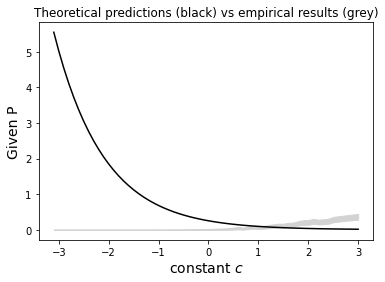

In [5]:
REP = 1000 ## repeats
n = 100

C = np.arange(-3.1,3.1,.1) #c is the constant and element of [-3, 3]

ic_avg=[]
for c in C:
    x = []
    p = (np.log(n)+np.log(np.log(n))+c)/(2*n) #updated formula
    for rep in range(REP):        
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        x.append(int(g.is_connected()))
    ic_avg.append(np.mean(x))

## theoretical
th = [((np.exp(-c))/4) for c in C] #updated formula

## plot
plt.fill_between(C,[x-1.654*np.sqrt(x*(1-x)/n) for x in ic_avg],
                 [x+1.645*np.sqrt(x*(1-x)/n) for x in ic_avg],color='lightgray')
plt.plot(C,th,color='black')
plt.title('Theoretical predictions (black) vs empirical results (grey)')
plt.xlabel(r'constant $c$',fontsize=14)
plt.ylabel('Given P',fontsize=14);

Larger graphs (n=10,000 nodes)

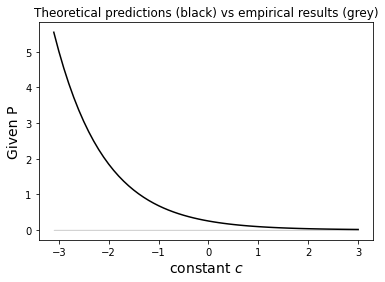

In [6]:
REP = 1000 ## repeats
n = 10000

C = np.arange(-3.1,3.1,.1) #c is the constant and element of [-3, 3]

ic_avg=[]
for c in C:
    x = []
    p = (np.log(n)+np.log(np.log(n))+c)/(2*n) #updated formula
    for rep in range(REP):        
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        x.append(int(g.is_connected()))
    ic_avg.append(np.mean(x))

## theoretical
th = [((np.exp(-c))/4) for c in C] #updated formula

## plot
plt.fill_between(C,[x-1.654*np.sqrt(x*(1-x)/n) for x in ic_avg],
                 [x+1.645*np.sqrt(x*(1-x)/n) for x in ic_avg],color='lightgray')
plt.plot(C,th,color='black')
plt.title('Theoretical predictions (black) vs empirical results (grey)')
plt.xlabel(r'constant $c$',fontsize=14)
plt.ylabel('Given P',fontsize=14);

'''
As constant goes to 3, the number of isolated edges go to 0, asymptotically. 
With smaller graphs, the number of isolated edges in experiments seems to increase and 
go over the asymptotic function graph; 
with larger graphs, the number of isolated edges in experiments stay under the asymptotic function graph
'''

### **Question 4:**

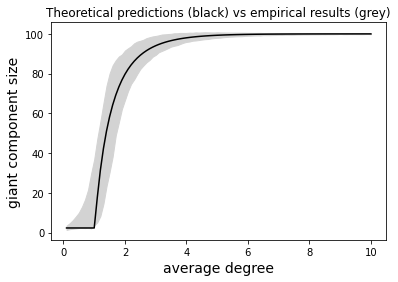

In [7]:
n = 100
# n=10000
gc_avg = []
gc_std = []
REP = 1000 ## repeats
ad = np.arange(.1,10.1,.1)
for d in ad:
    x = []
    p = d/(n-1)
    for rep in range(REP):
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        x.append(g.clusters().giant().vcount())
    gc_avg.append(np.mean(x))
    gc_std.append(np.std(x))

## theoretical as per given in the question
th = [np.log(n)/2 for i in np.arange(.1,1.1,.1)]
from scipy.optimize import fsolve
def fn(x,d):
    return x+np.exp(-x*d)-1
for i in np.arange(1.1,10.1,.1):
    th.append(n*fsolve(fn,1,args=(i))[0])

plt.fill_between(ad,[x[0]-1.654*x[1] for x in zip(gc_avg,gc_std)],
                 [x[0]+1.645*x[1] for x in zip(gc_avg,gc_std)],color='lightgray')
plt.plot(ad,th,color='black')
plt.title('Theoretical predictions (black) vs empirical results (grey)')
plt.xlabel('average degree',fontsize=14)
plt.ylabel('giant component size',fontsize=14);

## **Question 6:**

In [8]:
n = 10000
p = 1/4

g1 = ig.Graph.Erdos_Renyi(n=n, p=p)
g2 = ig.Graph.Erdos_Renyi(n=n, p=p)

In [9]:
g1_edges = g1.get_edgelist()
g2_edges = g2.get_edgelist()
g1_nx = nx.Graph(g1_edges)
g2_nx = nx.Graph(g2_edges)

In [10]:
g_union = nx.compose(g1_nx, g2_nx)
g_union.number_of_edges()

21866943

In [11]:
density = (g_union.number_of_edges()) / (math.comb(n, 2))
density

0.437382598259826

To conclude:

Calculated density above is ~.4, close to p + p = 1/2



### **Question 7:**

In [12]:
from igraph import Graph
d = 2
size=100
nei = 8
rp=100 #repeat
l_c = []
g_c = []
p_list = []

for i in range(rp):
    pr=np.random.random(1)
    g = ig.Graph.Watts_Strogatz(dim=d, size=100, nei=8, p=pr, loops=False)
    local_coef= g.transitivity_local_undirected(vertices=None, mode='nan', weights=None)
    l_c.append(np.average(local_coef))
    global_coef = g.transitivity_undirected(mode='nan')
    g_c.append(np.round(global_coef,3))
    p_list.append(pr)

In [13]:
print(np.round(l_c,2))

[0.01 0.05 0.01 0.02 0.13 0.28 0.14 0.02 0.24 0.33 0.13 0.01 0.25 0.18
 0.05 0.01 0.07 0.01 0.01 0.01 0.15 0.03 0.01 0.44 0.01 0.02 0.01 0.01
 0.15 0.01 0.05 0.35 0.02 0.01 0.01 0.04 0.16 0.12 0.09 0.02 0.19 0.01
 0.43 0.06 0.11 0.26 0.02 0.47 0.11 0.25 0.03 0.01 0.01 0.04 0.03 0.23
 0.01 0.05 0.29 0.01 0.01 0.19 0.02 0.09 0.25 0.05 0.07 0.02 0.09 0.03
 0.04 0.01 0.09 0.22 0.01 0.01 0.02 0.01 0.4  0.02 0.11 0.02 0.02 0.01
 0.07 0.01 0.02 0.03 0.01 0.29 0.01 0.26 0.03 0.01 0.07 0.07 0.01 0.08
 0.01 0.21]


In [14]:
print(np.round(g_c,2))

[0.01 0.05 0.01 0.02 0.13 0.28 0.14 0.02 0.24 0.33 0.13 0.01 0.25 0.18
 0.05 0.01 0.07 0.01 0.02 0.01 0.15 0.03 0.01 0.44 0.02 0.02 0.01 0.01
 0.15 0.01 0.05 0.35 0.02 0.01 0.01 0.04 0.16 0.12 0.09 0.02 0.18 0.01
 0.43 0.06 0.11 0.26 0.02 0.47 0.11 0.25 0.03 0.01 0.02 0.04 0.02 0.22
 0.01 0.04 0.29 0.01 0.01 0.19 0.02 0.09 0.25 0.04 0.07 0.02 0.09 0.02
 0.04 0.01 0.09 0.22 0.01 0.01 0.02 0.02 0.4  0.02 0.1  0.02 0.02 0.01
 0.06 0.01 0.02 0.03 0.01 0.29 0.01 0.26 0.03 0.01 0.07 0.07 0.02 0.08
 0.02 0.21]


Text(0, 0.5, 'Global clustering coefficient')

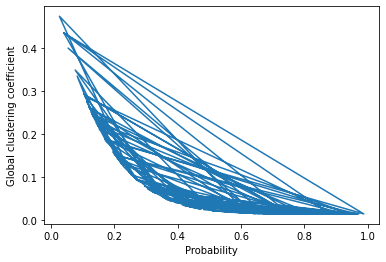

In [15]:
plt.plot(p_list, g_c)
plt.xlabel("Probability")
plt.ylabel("Global clustering coefficient")

Text(0, 0.5, 'Local clustering coefficient')

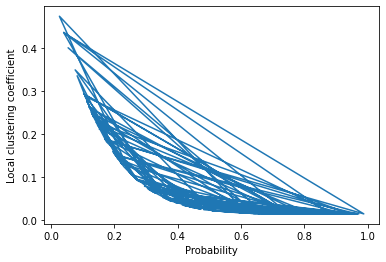

In [16]:
plt.plot(p_list, l_c)
plt.xlabel("Probability")
plt.ylabel("Local clustering coefficient")

Text(0, 0.5, 'Global clustering coefficient')

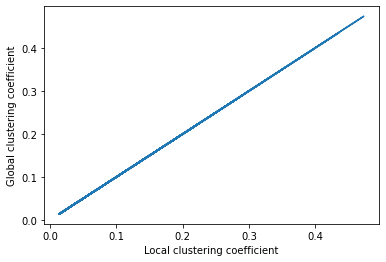

In [17]:
plt.plot(l_c, g_c)
plt.xlabel("Local clustering coefficient")
plt.ylabel("Global clustering coefficient")

### **Question 8:**

In [18]:
N = 50
#No. of Edges
m=5
g2 = ig.Graph.Barabasi(N, m, directed=True) #directed graph

C:\Users\G\anaconda3\envs\tensorflow_sessions\lib\site-packages\plfit\plfit.py:1012: RuntimeWarning: divide by zero encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
C:\Users\G\anaconda3\envs\tensorflow_sessions\lib\site-packages\plfit\plfit.py:1012: RuntimeWarning: invalid value encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
C:\Users\G\anaconda3\envs\tensorflow_sessions\lib\site-packages\plfit\plfit.py:1065: RuntimeWarning: divide by zero encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)
C:\Users\G\anaconda3\envs\tensorflow_sessions\lib\site-packages\plfit\plfit.py:1065: RuntimeWarning: invalid value encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)


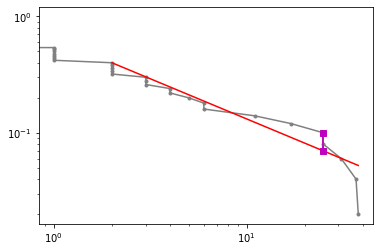

In [19]:
d = g2.degree(mode="in") #in degrees
X = plfit.plfit(d)
X.plotcdf(pointcolor='grey', pointmarker='.',zoom=False)


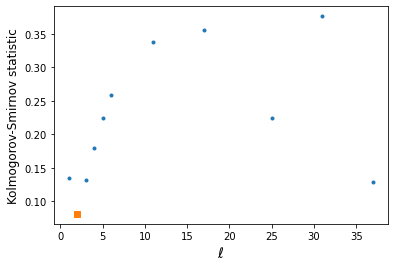

In [20]:
## plot K-S statistics vs. cutoff value l
ax = plt.figure(1)
ax = X.xminvsks() #xmin versus the ks value for the derived alpha
ax.set_xlabel(r'$\ell$',fontsize=14)
ax.set_ylabel('Kolmogorov-Smirnov statistic',fontsize=12);

In [21]:
KS_tst = X.test_pl(niter=100)

p(100) = 0.810


C:\Users\G\anaconda3\envs\tensorflow_sessions\lib\site-packages\plfit\plfit.py:1012: RuntimeWarning: divide by zero encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
C:\Users\G\anaconda3\envs\tensorflow_sessions\lib\site-packages\plfit\plfit.py:1012: RuntimeWarning: invalid value encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
C:\Users\G\anaconda3\envs\tensorflow_sessions\lib\site-packages\plfit\plfit.py:1065: RuntimeWarning: divide by zero encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)
C:\Users\G\anaconda3\envs\tensorflow_sessions\lib\site-packages\plfit\plfit.py:1065: RuntimeWarning: invalid value encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)


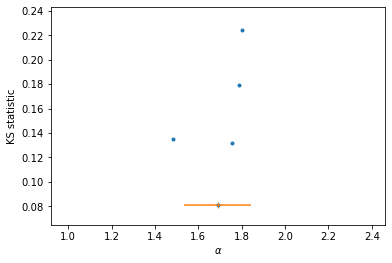

In [22]:
## plot K-S statistics vs. exponent (alpha here, gamma' in the book)
ax = plt.figure(1)
ax = X.alphavsks()